In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from distmetrics import compute_mahalonobis_dist_2d, get_asf_rtc_burst_ts, read_asf_rtc_image_data, despeckle_rtc_arrs_with_tv
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

In [3]:
BURST_ID = 'T009_019294_IW2'

In [4]:
df_rtc_ts = get_asf_rtc_burst_ts(BURST_ID)
print('# of results: ', df_rtc_ts.shape[0])
df_rtc_ts.head()

# of results:  21


,opera_id,acq_datetime,polarization,url_vh,url_vv,track_number,geometry,dedup_id
0,OPERA_L2_RTC-S1_T009-019294-IW2_20231007T08475...,2023-10-07 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32562 -5.40839, 143.36870 -5.398...",OPERA_L2_RTC-S1_T009-019294-IW2_20231007T084751Z
1,OPERA_L2_RTC-S1_T009-019294-IW2_20231019T08475...,2023-10-19 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32543 -5.40847, 143.36851 -5.398...",OPERA_L2_RTC-S1_T009-019294-IW2_20231019T084751Z
2,OPERA_L2_RTC-S1_T009-019294-IW2_20231031T08475...,2023-10-31 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32647 -5.40917, 144.11392 -5.234...",OPERA_L2_RTC-S1_T009-019294-IW2_20231031T084751Z
3,OPERA_L2_RTC-S1_T009-019294-IW2_20231112T08475...,2023-11-12 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32594 -5.40897, 144.11342 -5.234...",OPERA_L2_RTC-S1_T009-019294-IW2_20231112T084751Z
4,OPERA_L2_RTC-S1_T009-019294-IW2_20231124T08475...,2023-11-24 08:47:50+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32749 -5.40822, 144.11495 -5.233...",OPERA_L2_RTC-S1_T009-019294-IW2_20231124T084750Z


In [5]:
arrs_vv, profiles = read_asf_rtc_image_data(df_rtc_ts.url_vv.tolist())
arrs_vh, _ = read_asf_rtc_image_data(df_rtc_ts.url_vh.tolist())

Loading RTC data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:20<00:00,  1.04it/s]


In [6]:
arrs_vv_d = despeckle_rtc_arrs_with_tv(arrs_vv)
arrs_vh_d = despeckle_rtc_arrs_with_tv(arrs_vh)

  0%|                                                                                                         …

  0%|                                                                                                         …

In [7]:
for k, date in enumerate(df_rtc_ts.acq_datetime):
    print(k, date)

0 2023-10-07 08:47:51+00:00
1 2023-10-19 08:47:51+00:00
2 2023-10-31 08:47:51+00:00
3 2023-11-12 08:47:51+00:00
4 2023-11-24 08:47:50+00:00
5 2023-12-06 08:47:50+00:00
6 2023-12-18 08:47:49+00:00
7 2023-12-30 08:47:49+00:00
8 2024-01-11 08:47:48+00:00
9 2024-01-23 08:47:48+00:00
10 2024-02-04 08:47:47+00:00
11 2024-02-16 08:47:47+00:00
12 2024-02-28 08:47:47+00:00
13 2024-03-11 08:47:47+00:00
14 2024-03-23 08:47:48+00:00
15 2024-04-04 08:47:48+00:00
16 2024-04-16 08:47:48+00:00
17 2024-04-28 08:47:49+00:00
18 2024-05-22 08:47:48+00:00
19 2024-06-03 08:47:48+00:00
20 2024-06-15 08:47:48+00:00


In [8]:
pre_slice = slice(9, 19) # excludes last index
post_index = 19

In [9]:
dist_ob = compute_mahalonobis_dist_2d(arrs_vv_d[pre_slice],
                                      arrs_vh_d[pre_slice],
                                      arrs_vv_d[post_index],
                                      arrs_vh_d[post_index],
                                      kernel_size=3)

In [10]:
dist_ob.__fields__

{'dist': FieldInfo(annotation=ndarray, required=True),
 'mean': FieldInfo(annotation=ndarray, required=True),
 'cov': FieldInfo(annotation=ndarray, required=True),
 'cov_inv': FieldInfo(annotation=ndarray, required=True)}

Text(0, 0.5, 'Easting (m)')

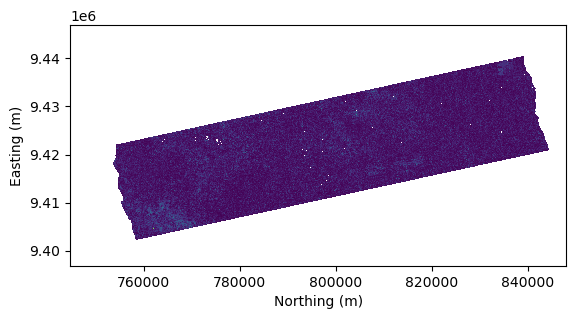

In [11]:
fig, ax = plt.subplots()
show(dist_ob.dist, interpolation='none', transform=profiles[0]['transform'], ax=ax)
ax.set_xlabel('Northing (m)')
ax.set_ylabel('Easting (m)')

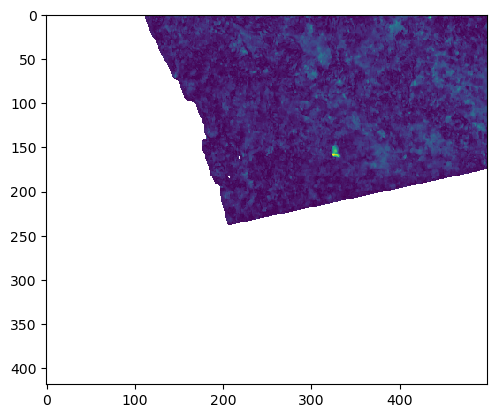

In [12]:
s = np.s_[1250:, 250:750]
plt.imshow(dist_ob.dist[s], interpolation='none')

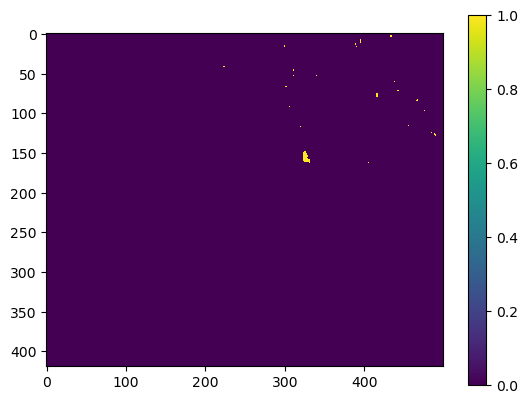

In [17]:
s = np.s_[1250:, 250:750]
plt.imshow(dist_ob.dist[s] > 6, interpolation='none')
plt.colorbar()